<a href="https://colab.research.google.com/github/aniruddha2003/Cricket_Match_ML/blob/main/Cricket_Match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
match_data_df = pd.read_csv('/content/match_data.csv',low_memory=False)
match_info_data_df = pd.read_csv('/content/match_info_data.csv',low_memory=False)

In [10]:
match_data_df.head(15)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1.0,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1.0,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1.0,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1.0,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1.0,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0
5,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1.0,0.6,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0
6,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1.0,1.1,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0
7,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1.0,1.2,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0
8,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1.0,1.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0
9,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1.0,1.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353.0


In [9]:
match_info_data_df.head(15)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit
5,1359544,2023,Bengaluru,2023/05/21,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,normal,0,Gujarat Titans,0,6,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru",Nitin Menon,VK Sharma,Tapan Sharma
6,1359542,2023,Kolkata,2023/05/20,Lucknow Super Giants,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Lucknow Super Giants,1,0,N Pooran,"Eden Gardens, Kolkata",J Madanagopal,UV Gandhe,YC Barde
7,1359541,2023,Delhi,2023/05/20,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,77,0,RD Gaikwad,"Arun Jaitley Stadium, Delhi",CB Gaffaney,NA Patwardhan,AK Chaudhary
8,1359540,2023,Dharamsala,2023/05/19,Punjab Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,D Padikkal,"Himachal Pradesh Cricket Association Stadium, ...",A Nand Kishore,RJ Tucker,Navdeep Singh
9,1359539,2023,Hyderabad,2023/05/18,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,V Kohli,"Rajiv Gandhi International Stadium, Uppal, Hyd...",BNJ Oxenford,VK Sharma,HAS Khalid


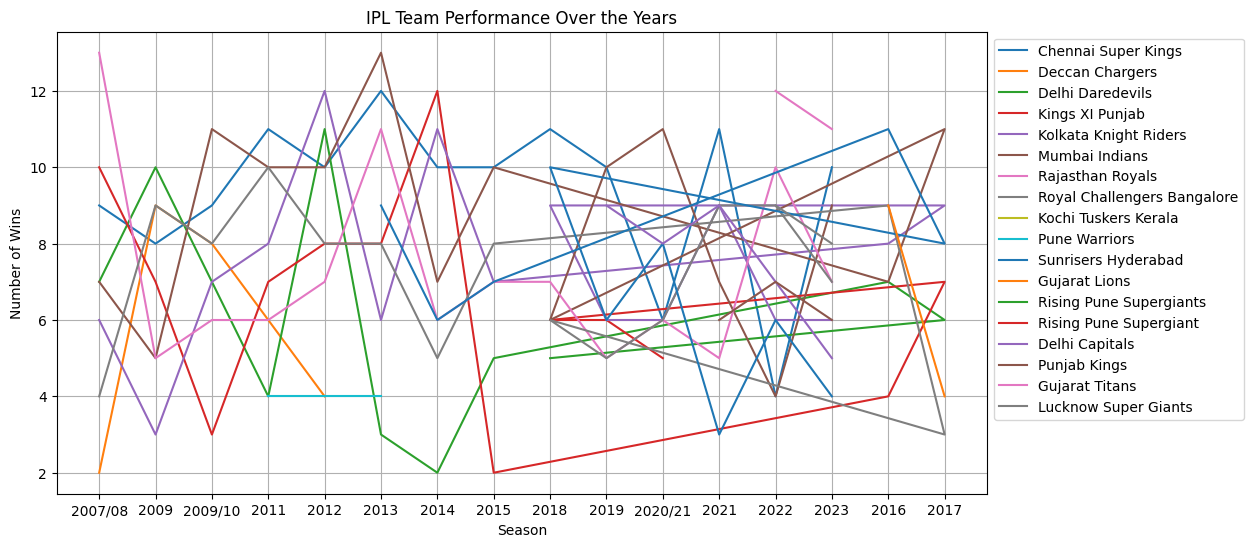

In [6]:
team_wins = match_info_data_df.groupby(['season', 'winner'])['id'].count().reset_index()
plt.figure(figsize=(12, 6))
for team in team_wins['winner'].unique():
    team_data = team_wins[team_wins['winner'] == team]
    plt.plot(team_data['season'], team_data['id'], label=team)

plt.title('IPL Team Performance Over the Years')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [7]:
toss_decision_counts = match_info_data_df['toss_decision'].value_counts()
match_outcomes = match_info_data_df['result'].value_counts()

batting_first_wins = match_info_data_df[match_info_data_df['toss_decision'] == 'bat']['result'].value_counts()
bowling_first_wins = match_info_data_df[match_info_data_df['toss_decision'] == 'field']['result'].value_counts()

batting_first_percentage = (batting_first_wins / toss_decision_counts['bat']) * 100
bowling_first_percentage = (bowling_first_wins / toss_decision_counts['field']) * 100

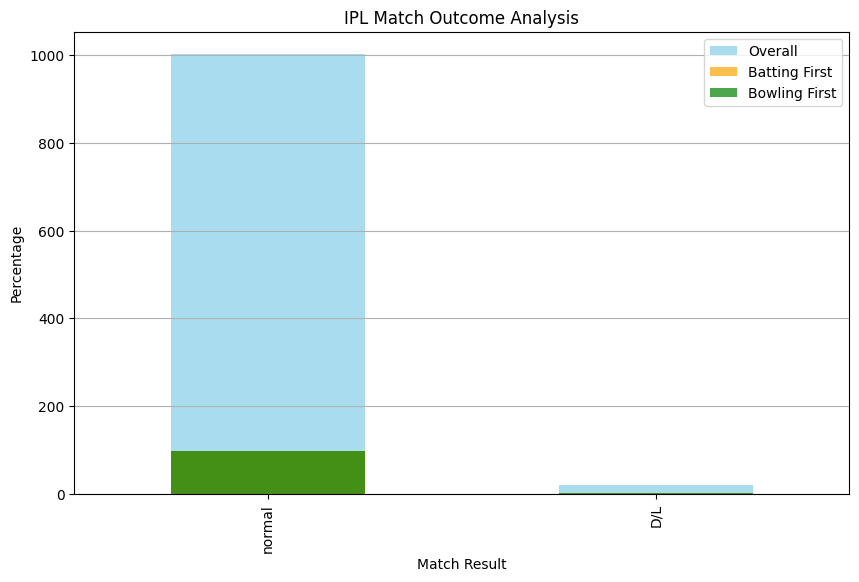

In [8]:
plt.figure(figsize=(10, 6))
match_outcomes.plot(kind='bar', color='skyblue', alpha=0.7, label='Overall')
batting_first_percentage.plot(kind='bar', color='orange', alpha=0.7, label='Batting First')
bowling_first_percentage.plot(kind='bar', color='green', alpha=0.7, label='Bowling First')

plt.title('IPL Match Outcome Analysis')
plt.xlabel('Match Result')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()